# Support Vector Machines

## Data preparation

In [37]:
import pandas as pd

In [38]:
jain = pd.read_csv("jain.txt", sep='\t', header=None, names=["X", "Y", 'cls' ])
jain

X      Y  cls
0     0.85  17.45    2
1     0.75  15.60    2
2     3.30  15.45    2
3     5.25  14.20    2
4     4.90  15.65    2
..     ...    ...  ...
368  38.75  16.85    1
369  39.00  16.60    1
370  38.25  17.35    1
371  39.50  16.95    1
372  39.90  17.05    1

[373 rows x 3 columns]

In [39]:
jain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       373 non-null    float64
 1   Y       373 non-null    float64
 2   cls     373 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 8.9 KB


In [40]:
jain.describe()

X           Y         cls
count  373.000000  373.000000  373.000000
mean    24.330697   12.145979    1.260054
std      9.853372    6.605375    0.439253
min      0.750000    2.950000    1.000000
25%     17.350000    6.300000    1.000000
50%     23.150000   11.250000    1.000000
75%     33.350000   16.500000    2.000000
max     41.300000   27.850000    2.000000

In [41]:
flame = pd.read_csv("flame.txt", sep='\t', header=None, names=["X", "Y", 'cls' ])
flame

X      Y  cls
0    1.85  27.80    1
1    1.35  26.65    1
2    1.40  23.25    2
3    0.85  23.05    2
4    0.50  22.35    2
..    ...    ...  ...
235  7.50  26.20    1
236  7.50  25.65    1
237  7.05  25.85    1
238  6.90  27.15    1
239  6.15  26.90    1

[240 rows x 3 columns]

In [42]:
flame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       240 non-null    float64
 1   Y       240 non-null    float64
 2   cls     240 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.8 KB


In [43]:
flame.describe()

X           Y         cls
count  240.000000  240.000000  240.000000
mean     7.323750   20.928542    1.637500
std      3.202509    3.383390    0.481727
min      0.500000   14.450000    1.000000
25%      5.250000   18.237500    1.000000
50%      7.300000   20.775000    2.000000
75%      9.312500   23.562500    2.000000
max     14.200000   27.800000    2.000000

In [44]:
colors = ['r', 'g']
markers = ['o', 'o']
clss = [1, 2]

plot_params = [clss, colors, markers]
plot_params

[[1, 2], ['r', 'g'], ['o', 'o']]

In [45]:
import matplotlib.pyplot as plt

def print_2D_graph(plot_params, data_frame):
    n = len(plot_params[0])
    for i in range(n):
        cls = plot_params[0][i]
        color = plot_params[1][i]
        marker = plot_params[2][i]
        points = data_frame[data_frame['cls'] == cls]
        plt.scatter(points['X'], 
                    points['Y'], 
                    c=color, label=f"Class {cls}", marker=marker)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='upper right')
    plt.tight_layout()

    plt.show()

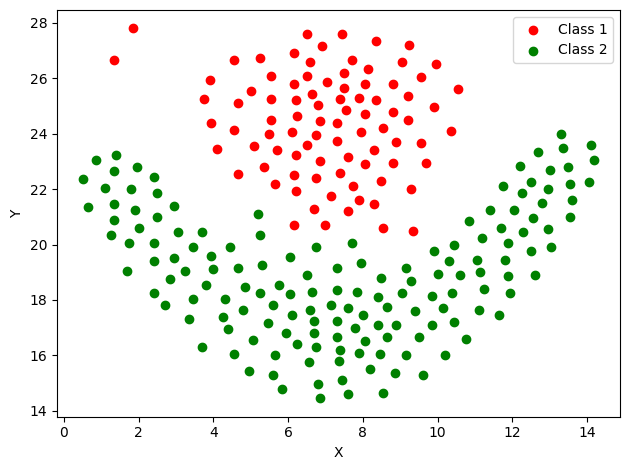

In [46]:
print_2D_graph(plot_params, flame)

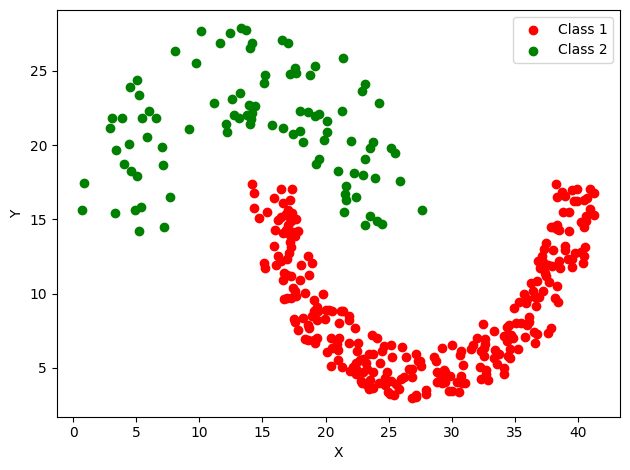

In [47]:
print_2D_graph(plot_params, jain)

In [48]:
from sklearn.model_selection import train_test_split

data_flame = flame
clss_flame = flame.pop('cls')

print(data_flame.head(10))
print('\n', clss_flame[:10])

      X      Y
0  1.85  27.80
1  1.35  26.65
2  1.40  23.25
3  0.85  23.05
4  0.50  22.35
5  0.65  21.35
6  1.10  22.05
7  1.35  22.65
8  1.95  22.80
9  2.40  22.45

 0    1
1    1
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: cls, dtype: int64


In [49]:
X_train_flame, X_test_flame, y_train_flame, y_test_flame = train_test_split(data_flame, clss_flame,  test_size=0.2, random_state=42)
print(X_train_flame.size, X_test_flame.size)

384 96


In [50]:
data_jain = jain[['X', 'Y']]
clss_jain = jain.pop('cls')

print(data_jain.head(10))
print('\n', clss_jain[:10])

      X      Y
0  0.85  17.45
1  0.75  15.60
2  3.30  15.45
3  5.25  14.20
4  4.90  15.65
5  5.35  15.85
6  5.10  17.90
7  4.60  18.25
8  4.05  18.75
9  3.40  19.70

 0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: cls, dtype: int64


## Plot functions preparation

In [228]:
import numpy as np

def plot_base_points(X, y):
    X = X.to_numpy()
    y = y.to_numpy()

    markers = ('o', 'o')
    colors = ('red', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

In [283]:
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
from  matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=0.1, ax=None):
    if ax is None:
        ax = plt.gca()
        
    X = X.to_numpy()
    y = y.to_numpy()
    
    classifier.fit(X, y)

    # setup marker generator and color map
    markers = ('o', 'o', '^', 'v', '<')
    colors = ('red', 'green', 'blue', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    cmap_gradient = LinearSegmentedColormap.from_list('rg',['red', 'white', 'green'], N=32) 


    # plot the decision surface
    DecisionBoundaryDisplay.from_estimator(
        classifier, 
        X, 
        cmap=cmap_gradient, 
        ax=ax, 
        alpha=0.5, 
        eps=1)
    
    DecisionBoundaryDisplay.from_estimator(
        classifier,
        X,
        ax=ax,
        plot_method="contour",
        colors='black',
        levels=[-1, 0, 1],
        alpha=0.7,
        linestyles=["--", "-", "--"],
    )
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}', 
                    edgecolor='black')
                    

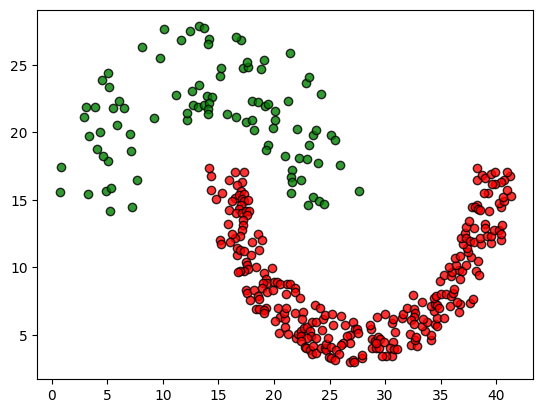

In [230]:
plot_base_points(data_jain, clss_jain)

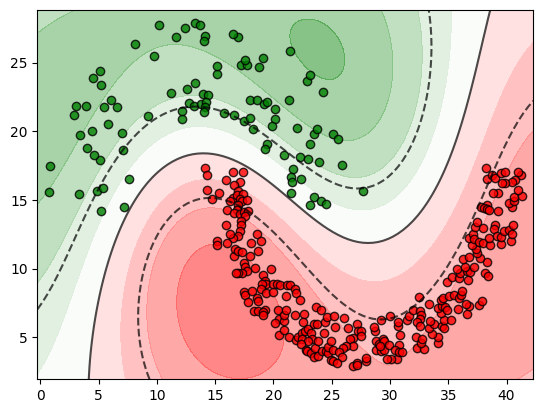

In [284]:
from sklearn.svm import SVC

plot_decision_regions(data_jain, clss_jain, SVC())

In [266]:
def subplot_different_parameters(classifiers, titles):    
    figure = plt.figure(figsize=(18, 8))
    n = len(classifiers)
    
    ax = plt.subplot(2, n+1, 1)
    ax.set_title('Points')
    plot_base_points(data_jain, clss_jain)
    
    ax = plt.subplot(2, n+1, n+2)
    plot_base_points(data_flame, clss_flame)
    
    for i in range(n):
        ax = plt.subplot(2, n+1, i+2)
        ax.set_title(titles[i])
        plot_decision_regions(data_jain, clss_jain, classifiers[i])
                                   
        ax = plt.subplot(2, n+1, n+1+i+2)
        plot_decision_regions(data_flame, clss_flame, classifiers[i])


In [280]:
def subplot_different_parameters_columns(classifiers, titles):    
    n = len(classifiers)
    figure = plt.figure(figsize=(18, 9*(n+1)))
    
    ax = plt.subplot(n+1, 2, 1)
    ax.set_title('Points')
    plot_base_points(data_jain, clss_jain)
    
    ax = plt.subplot(n+1, 2, 2)
    plot_base_points(data_flame, clss_flame)
    
    index = 3
    for i in range(n):
        ax = plt.subplot(n+1, 2, index)
        ax.set_title(titles[i])
        plot_decision_regions(data_jain, clss_jain, classifiers[i])
                                   
        ax = plt.subplot(n+1, 2, index+1)
        ax.set_title(titles[i])
        plot_decision_regions(data_flame, clss_flame, classifiers[i])
        
        index += 2

## Default sklearn SVC kernels

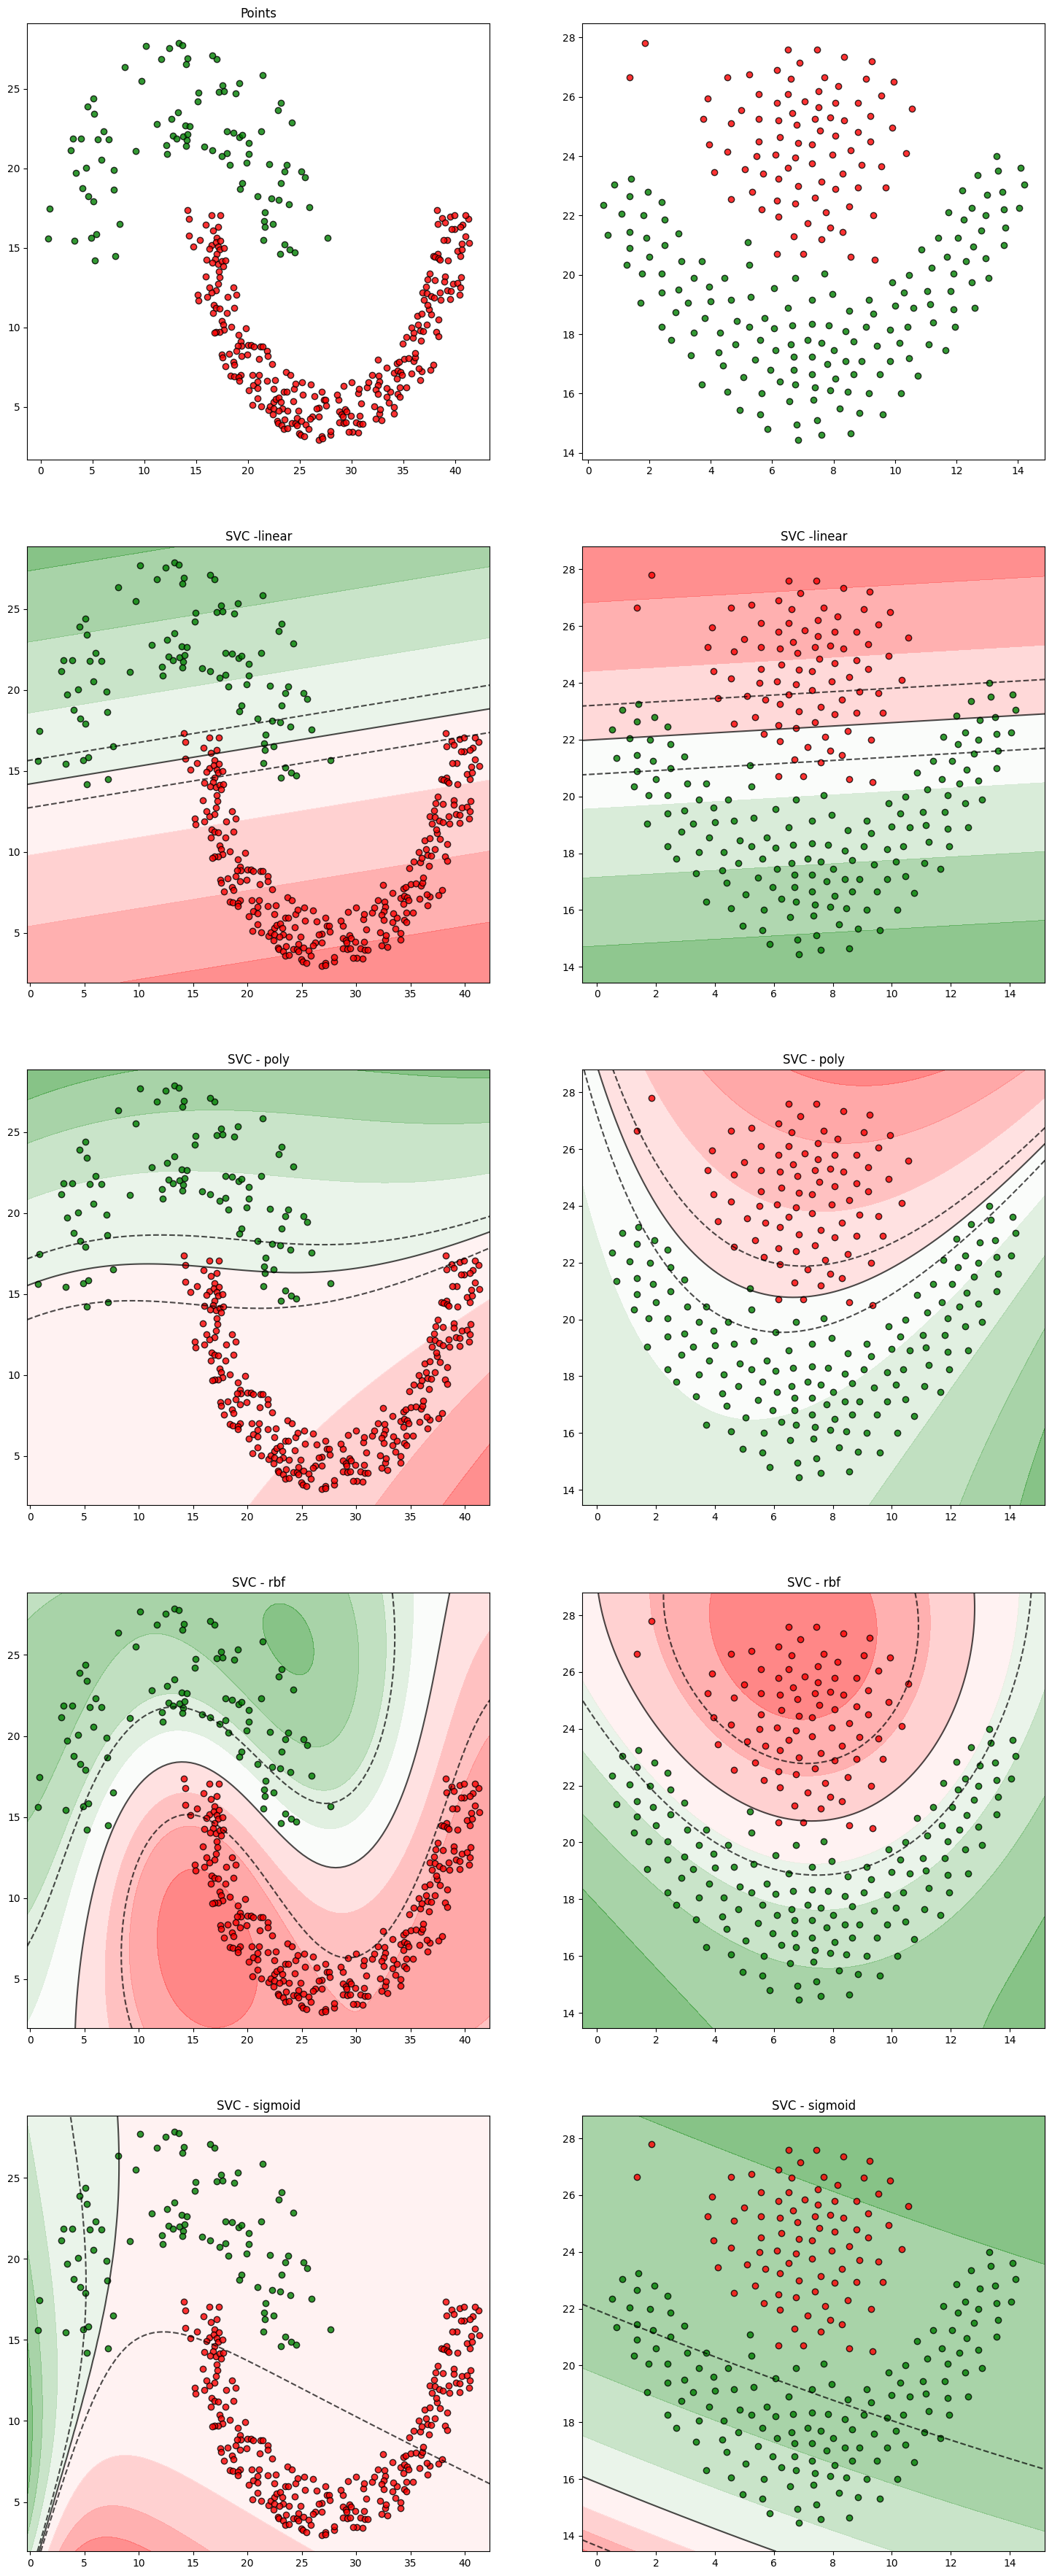

In [285]:
classifiers = [SVC(kernel='linear'), 
                SVC(kernel='poly'), 
                SVC(kernel='rbf'),
                SVC(kernel='sigmoid')]


titles = ['SVC -linear', 
          'SVC - poly', 
          'SVC - rbf',
          'SVC - sigmoid']


subplot_different_parameters_columns(classifiers, titles)

## Linear

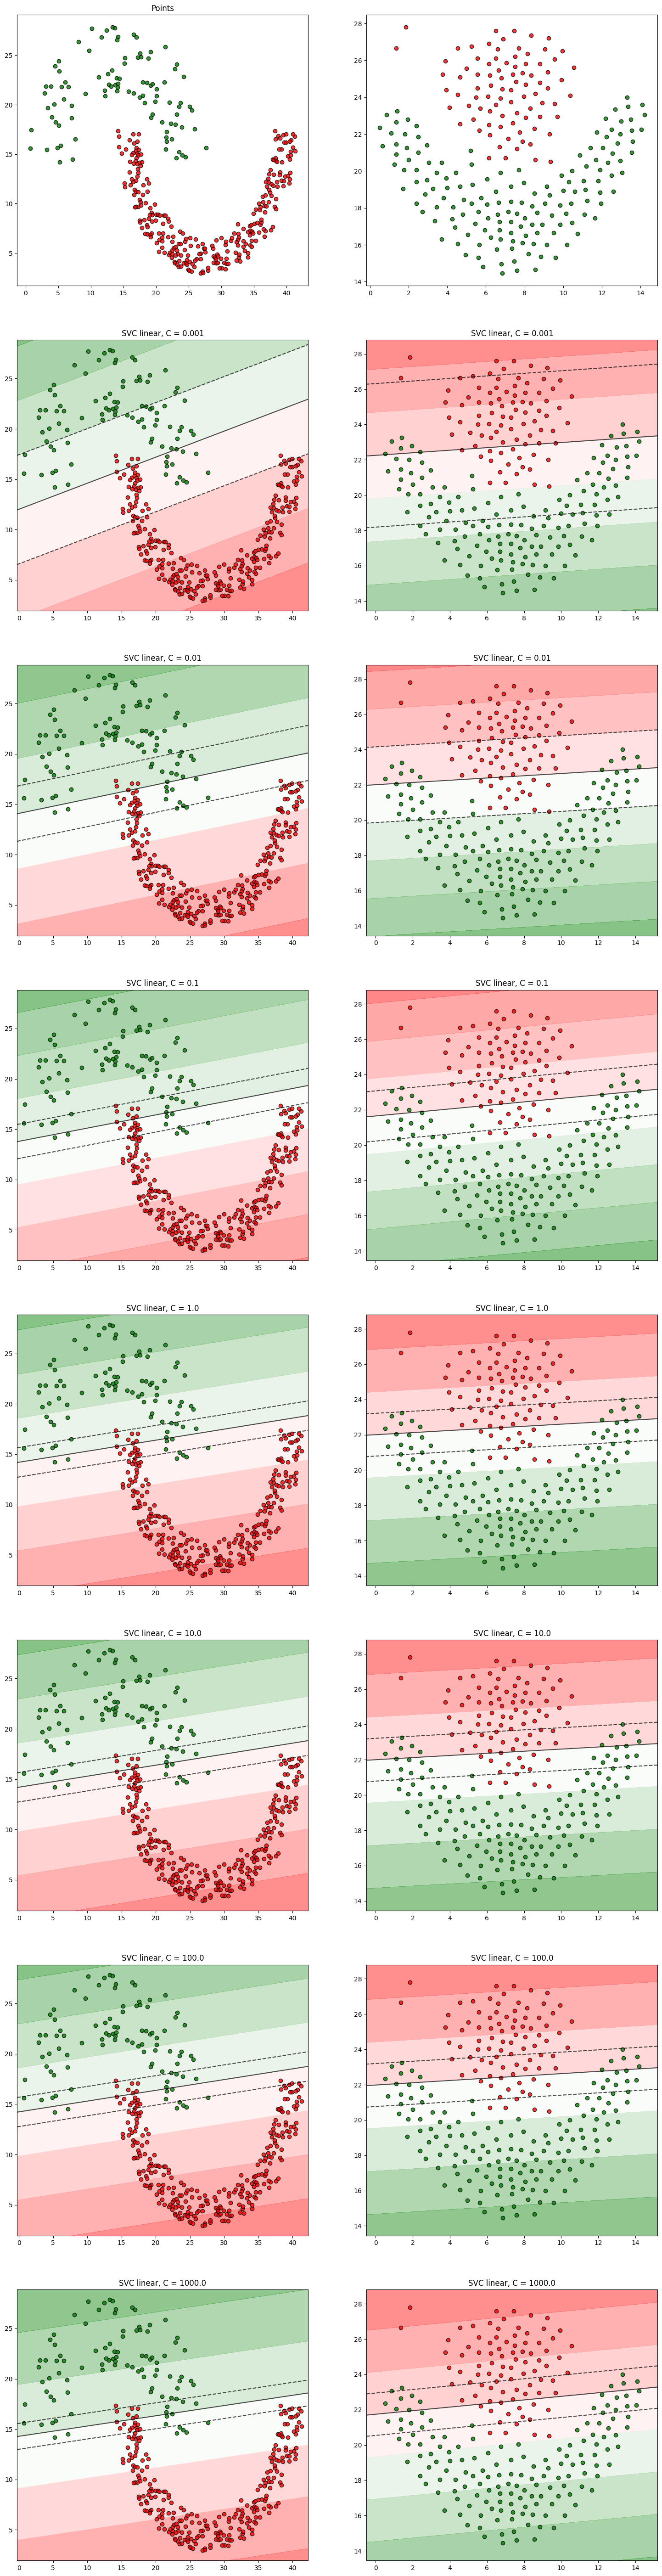

In [288]:
c = 0.001
classifiers = []
titles = []

while c <= 1000:
    classifiers.append(SVC(kernel='linear', C=c))
    titles.append(f"SVC linear, C = {str(c)}")    
    c *= 10

subplot_different_parameters_columns(classifiers, titles)

Mniejsze wartości C (parametr regularyzacji) wiążą się z większym marginesem pomiędzy wektorami.  

## Niepełny naturalny iloczyn skalarny

In [322]:
def incomplete_dot_kernel_1(x, y):
    n = x.shape[0]
    m = y.shape[0]
    result = np.zeros((n, m))
    
    for i in range(n):
        for j in range(m):
            result[i,j] = x[i, 0] * y[j, 0]
                         
    return result

def incomplete_dot_kernel_2(x, y):
    n = x.shape[0]
    m = y.shape[0]
    result = np.zeros((n, m))
    
    for i in range(n):
        for j in range(m):
            result[i,j] = x[i, 1] * y[j, 1]
                         
    return result

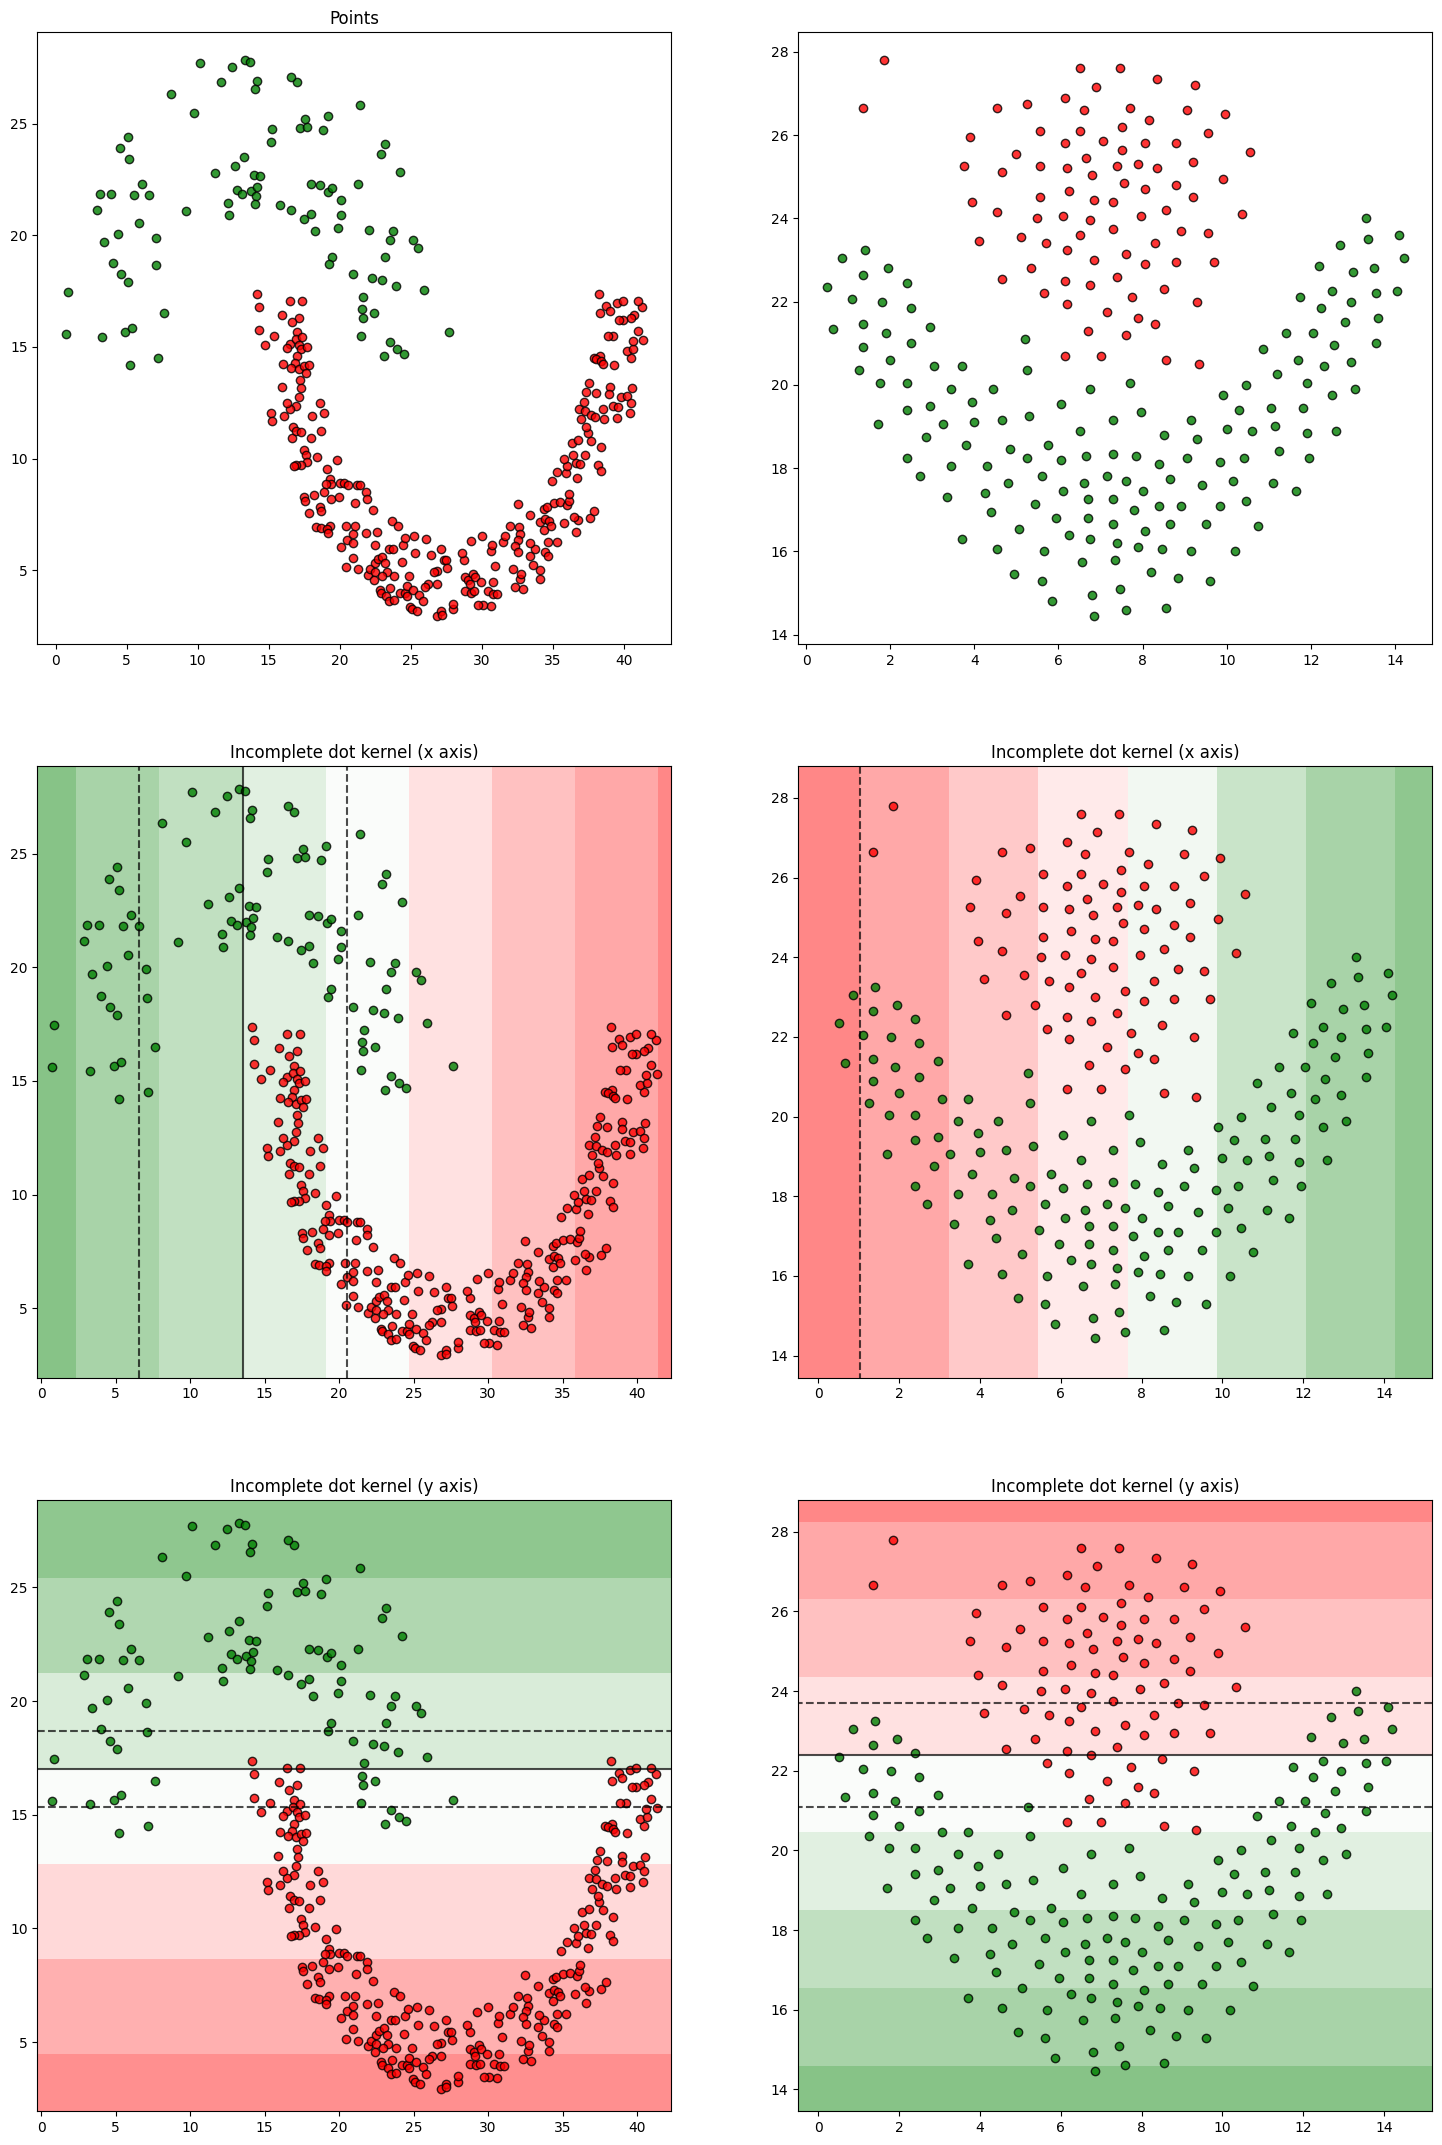

In [324]:
classifiers = []
titles = []

classifiers.append(SVC(kernel=incomplete_dot_kernel_1))
classifiers.append(SVC(kernel=incomplete_dot_kernel_2))

titles.append('Incomplete dot kernel (x axis)')
titles.append('Incomplete dot kernel (y axis)')


subplot_different_parameters_columns(classifiers, titles)

Stosując taką funkcję uzyskujemy prosty podział, równoległy do osi x lub y.

## RBF

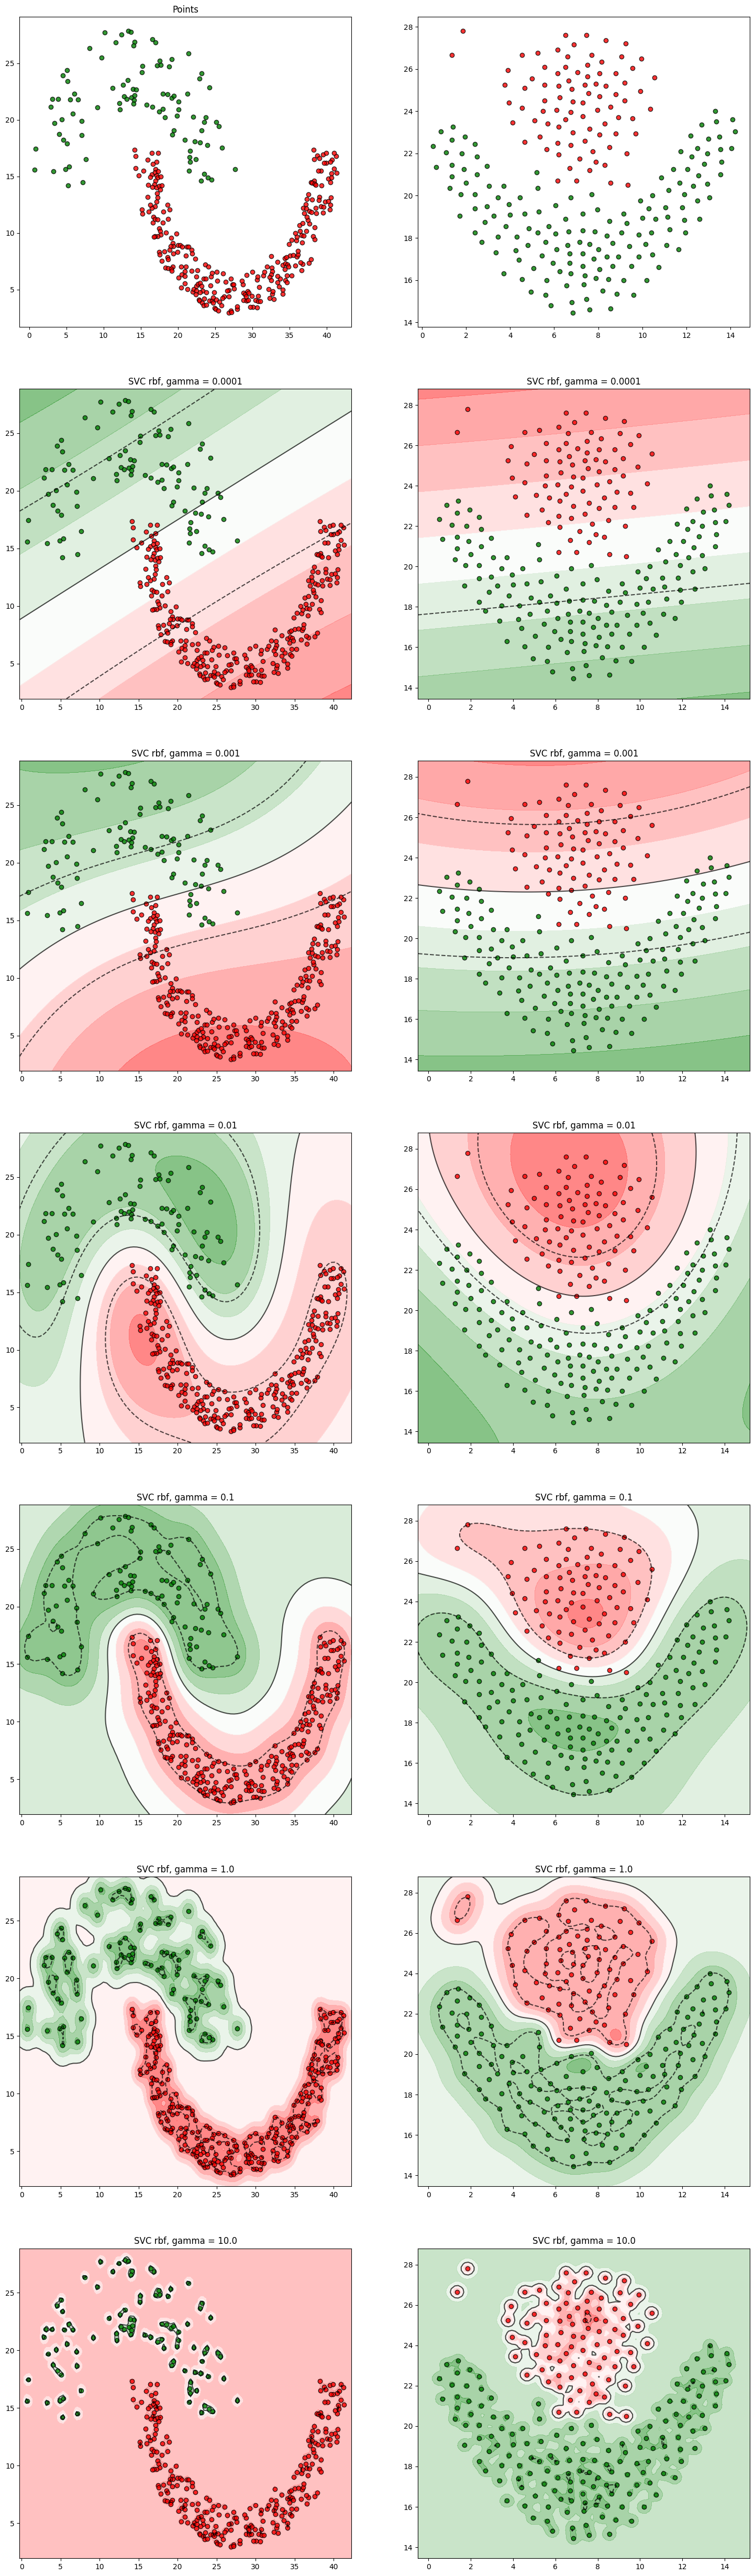

In [329]:
g = 0.0001
classifiers = []
titles = []

while g <= 10:
    classifiers.append(SVC(kernel='rbf', gamma=g))
    titles.append(f"SVC rbf, gamma = {str(g)}")    
    g *= 10

subplot_different_parameters_columns(classifiers, titles)

Mniejsze wartości parametru gamma wiążą się z większym marginesem pomiędzy wektorami. Dla bardzo małych wartości wektor rozdzielający klasy jest zbliżony do prostej. Dla wartości parametru gamma równych 1 i większych, następuje przeuczenie klasyfikatora. 

## Funkcja skokowa

In [349]:
def stairs_kernel_0_5(x, y):
    R = 0.5
    n = x.shape[0]
    m = y.shape[0]
    result = np.zeros((n, m))
    
    for i in range(n):
        for j in range(m):
            if (np.sqrt((x[i, 0] - y[j, 0])**2 + (x[i, 1] - y[j, 1])**2)) <= R:
                result[i,j] = 1
    
    return result

def stairs_kernel_1(x, y):
    R = 1
    n = x.shape[0]
    m = y.shape[0]
    result = np.zeros((n, m))
    
    for i in range(n):
        for j in range(m):
            if (np.sqrt((x[i, 0] - y[j, 0])**2 + (x[i, 1] - y[j, 1])**2)) <= R:
                result[i,j] = 1
    
    return result


def stairs_kernel_5(x, y):
    R = 5
    n = x.shape[0]
    m = y.shape[0]
    result = np.zeros((n, m))
    
    for i in range(n):
        for j in range(m):
            if (np.sqrt((x[i, 0] - y[j, 0])**2 + (x[i, 1] - y[j, 1])**2)) <= R:
                result[i,j] = 1
    
    return result


def stairs_kernel_10(x, y):
    R = 10
    n = x.shape[0]
    m = y.shape[0]
    result = np.zeros((n, m))
    
    for i in range(n):
        for j in range(m):
            if (np.sqrt((x[i, 0] - y[j, 0])**2 + (x[i, 1] - y[j, 1])**2)) <= R:
                result[i,j] = 1
    
    return result


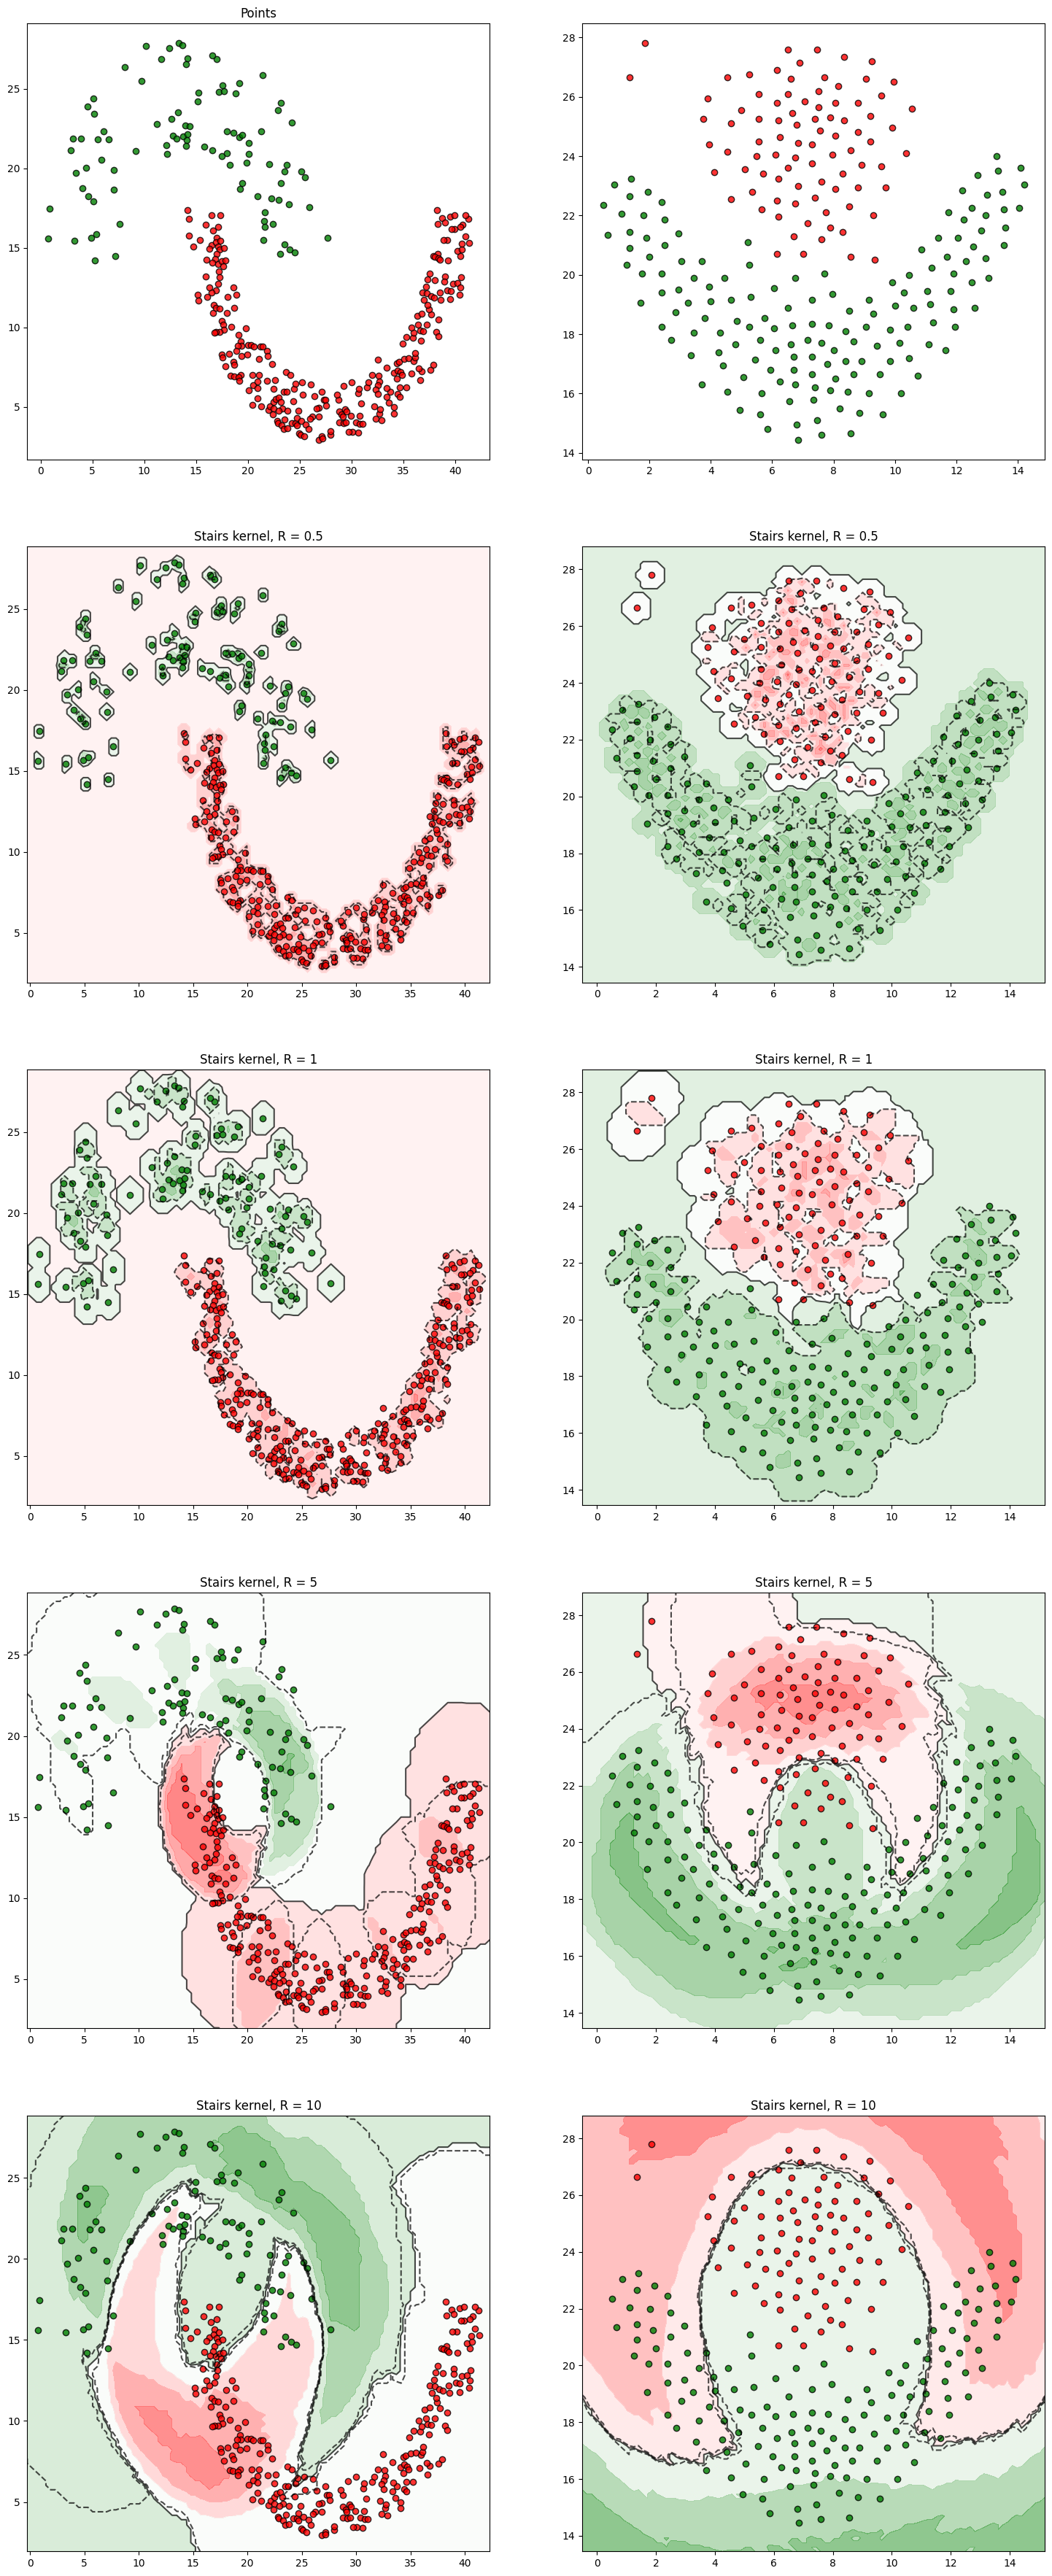

In [350]:
classifiers = []
titles = []

classifiers.append(SVC(kernel=stairs_kernel_0_5))
classifiers.append(SVC(kernel=stairs_kernel_1))
classifiers.append(SVC(kernel=stairs_kernel_5))
classifiers.append(SVC(kernel=stairs_kernel_10))

titles.append('Stairs kernel, R = 0.5')
titles.append('Stairs kernel, R = 1')
titles.append('Stairs kernel, R = 5')
titles.append('Stairs kernel, R = 10')

subplot_different_parameters_columns(classifiers, titles)

Mniejsza odległość (parametr R) w funkcji kernela powoduje ciaśniejsze dopasowanie się klasyfikatora do danych, na których się uczy. Żaden z wytrenowanych modeli nie wygląda jednak na dobry do zasotoswania w praktyce.

## Hinge function 
Funkcja zawiasowa

In [351]:
def hinge_kernel_0_5(x, y):
    R = 0.5
    n = x.shape[0]
    m = y.shape[0]
    result = np.zeros((n, m))
    
    for i in range(n):
        for j in range(m):
            d = np.sqrt((x[i, 0] - y[j, 0])**2 + (x[i, 1] - y[j, 1])**2)
            if d <= R:
                result[i,j] = 1 - d/R
    
    return result


def hinge_kernel_1(x, y):
    R = 1
    n = x.shape[0]
    m = y.shape[0]
    result = np.zeros((n, m))
    
    for i in range(n):
        for j in range(m):
            d = np.sqrt((x[i, 0] - y[j, 0])**2 + (x[i, 1] - y[j, 1])**2)
            if d <= R:
                result[i,j] = 1 - d/R
    
    return result


def hinge_kernel_5(x, y):
    R = 5
    n = x.shape[0]
    m = y.shape[0]
    result = np.zeros((n, m))
    
    for i in range(n):
        for j in range(m):
            d = np.sqrt((x[i, 0] - y[j, 0])**2 + (x[i, 1] - y[j, 1])**2)
            if d <= R:
                result[i,j] = 1 - d/R
    
    return result


def hinge_kernel_10(x, y):
    R = 10
    n = x.shape[0]
    m = y.shape[0]
    result = np.zeros((n, m))
    
    for i in range(n):
        for j in range(m):
            d = np.sqrt((x[i, 0] - y[j, 0])**2 + (x[i, 1] - y[j, 1])**2)
            if d <= R:
                result[i,j] = 1 - d/R
    
    return result


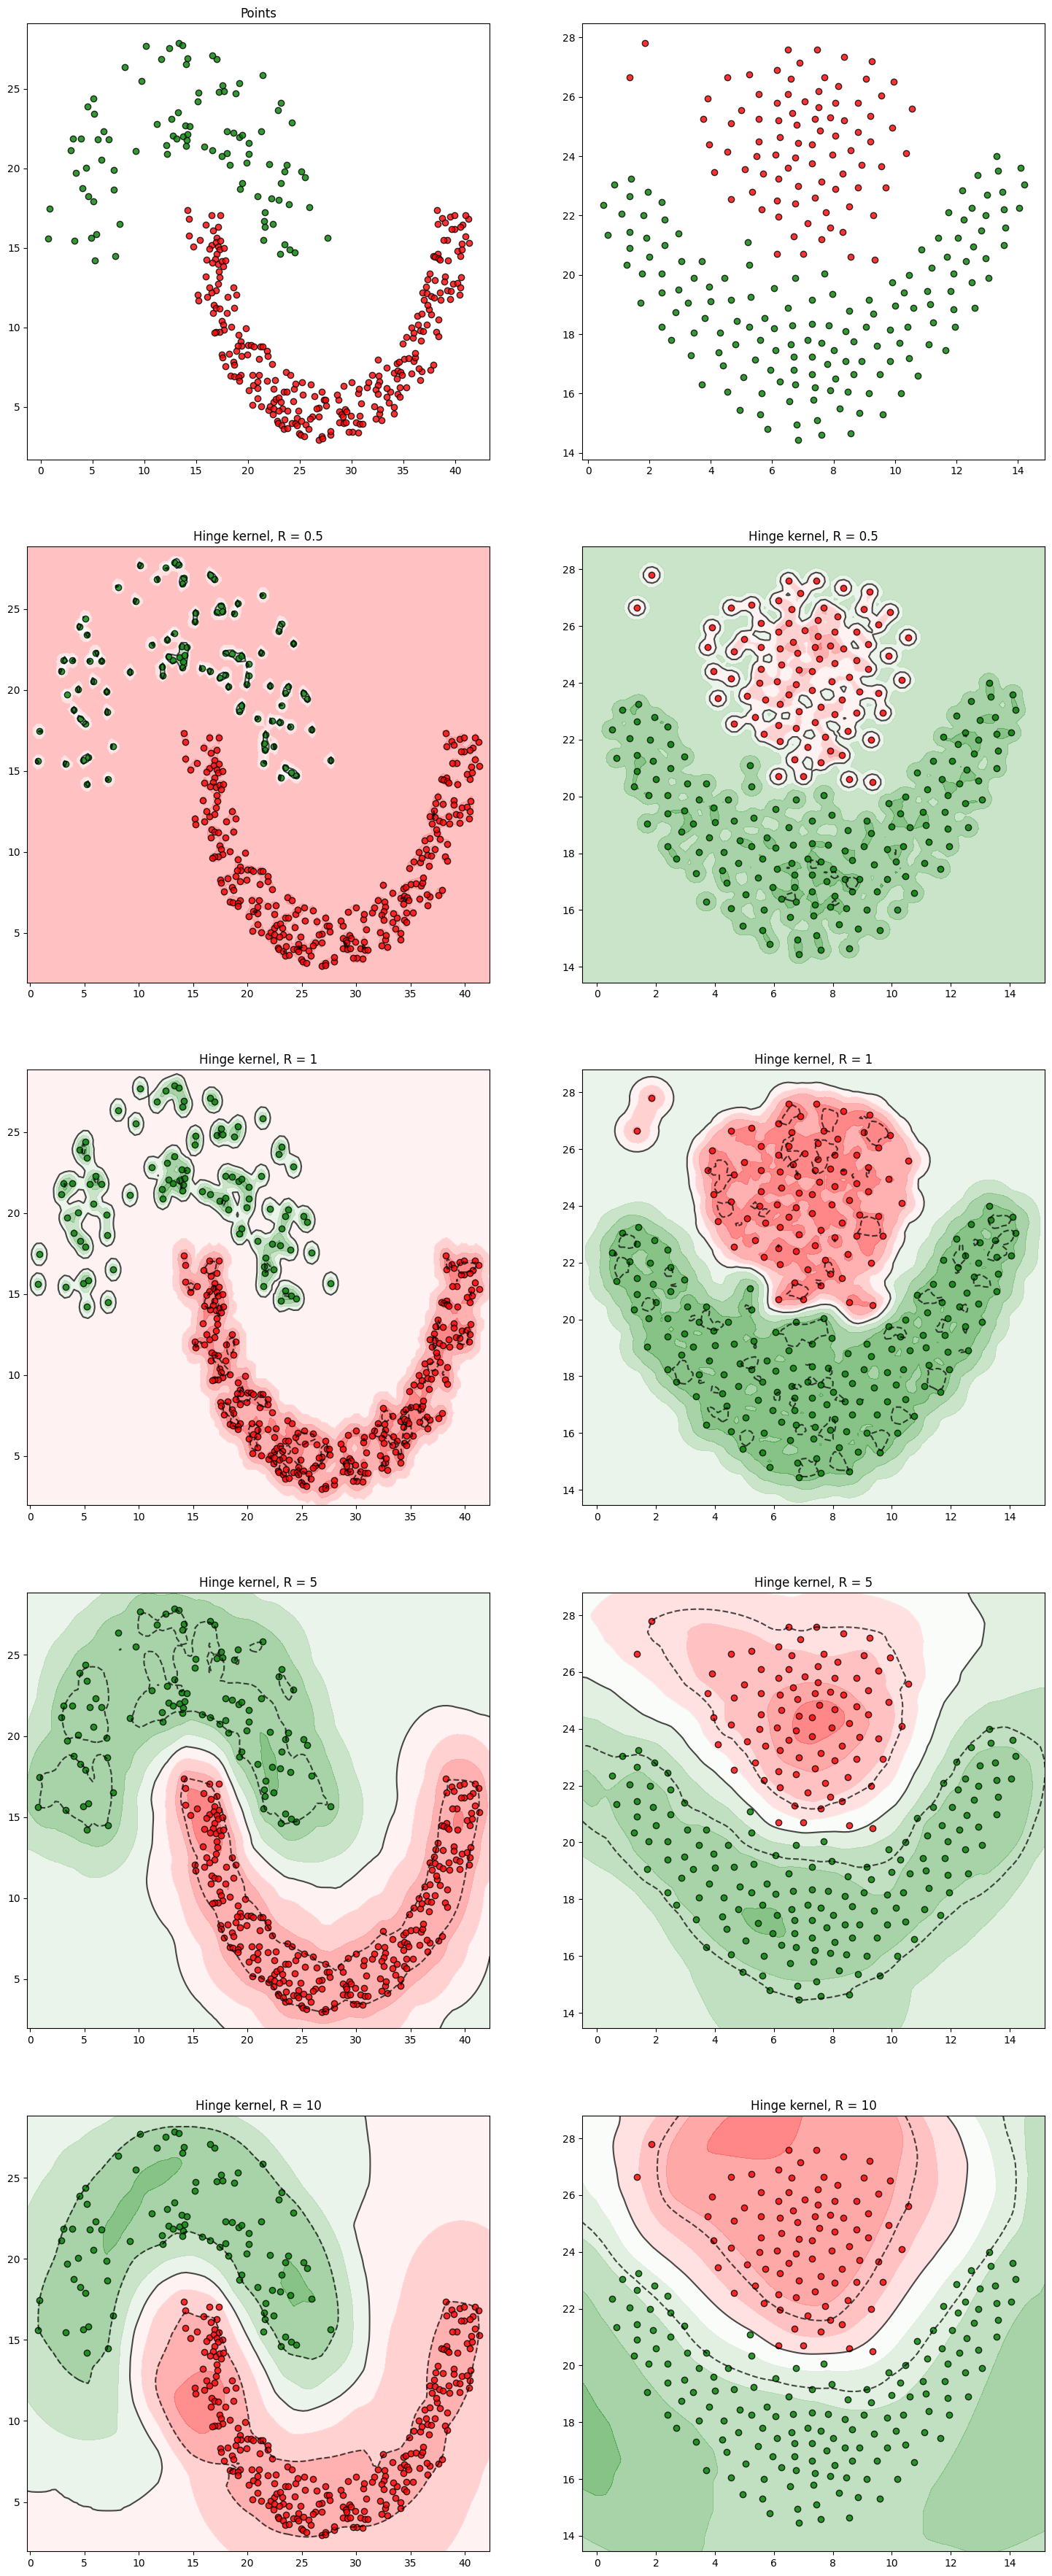

In [352]:
classifiers = []
titles = []

classifiers.append(SVC(kernel=hinge_kernel_0_5))
classifiers.append(SVC(kernel=hinge_kernel_1))
classifiers.append(SVC(kernel=hinge_kernel_5))
classifiers.append(SVC(kernel=hinge_kernel_10))

titles.append('Hinge kernel, R = 0.5')
titles.append('Hinge kernel, R = 1')
titles.append('Hinge kernel, R = 5')
titles.append('Hinge kernel, R = 10')

subplot_different_parameters_columns(classifiers, titles)

W przypadku funkcji zawiasowej mniejsza odległość (parametr R) w funkcji kernela powoduje luźniejsze dopasowanie się klasyfikatora do danych, na których się uczy. Uzyskane wyniki są lepsze niż w przypadku funkcji skokowej.